# Riemann Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

In [28]:
import os
#create directory where to save images called images 
print(os.getcwd())

os.makedirs('./Sod_imm')
os.listdir('./')

/home/matteo/Homework2


['TOV_example.par',
 'ETK_1D_plots.ipynb',
 'Sod_1d.par',
 'TOV_example.par~',
 'TOV_example',
 'Sod_1d_400',
 'cactus_sim',
 'ETK_TOV_plots.ipynb',
 'Sod_imm',
 'Sod_exact.dat',
 '.ipynb_checkpoints',
 'Tov_imm',
 'TOV_example_2']

## Exact Solution

In [3]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [4]:
x_exact=exact[:,0]       #assining arrays to the data i need to plot
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

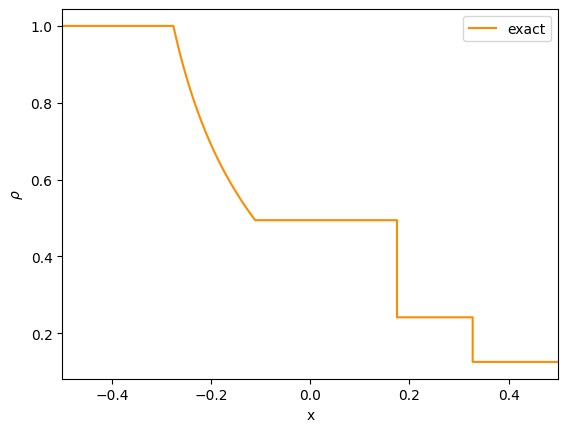

In [5]:
plt.plot(x_exact, rho_exact,color = 'darkorange', label="exact")
plt.xlim(-0.5, 0.5)
plt.xlabel('x')
plt.ylabel(r'$\rho$')
plt.legend()                #for the density
#plt.savefig('./Sod_imm/exact.png')
plt.show()              #we can see a RAR wave prop. to the left ; a CD prop. to the right and a SHK wave also prop. to the right

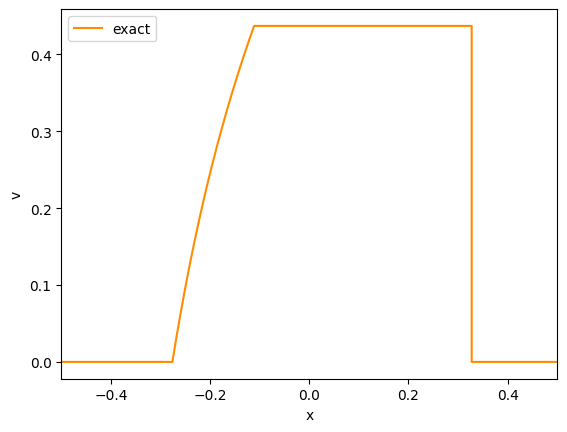

In [6]:
plt.plot(x_exact, vx_exact,color='darkorange', label="exact")
plt.xlim(-0.5, 0.5)
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
#plt.savefig('./Sod_imm/V_exact')
plt.show()  #for the velocity we only have a RAR to the left and a SHK to the right. Same for the pressure

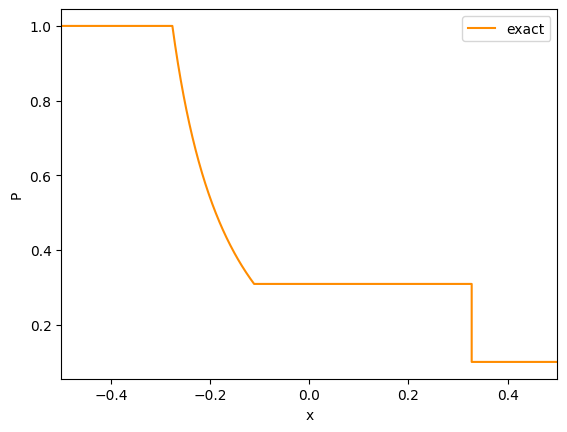

In [7]:
plt.plot(x_exact, press_exact,color='darkorange', label="exact")
plt.xlim(-0.5, 0.5)
plt.xlabel('x')
plt.ylabel('P')
plt.legend()
#plt.savefig('./Sod_imm/P_exact')
plt.show() 

## Read the Numerical Results

In [8]:
gf= SimDir("./Sod_1d_400/").gf      #grid function
gf_2= SimDir("./Sod_1d_1000/").gf
gf_3= SimDir("./Sod_1d_2000/").gf
gf_4= SimDir("./Sod_1d_200/").gf
gf_5= SimDir("./Sod_1d_800/").gf

print(gf)                             #find all the gf available, those found were only in 1d in this case
print(gf_2)
print(gf_3) 
print(gf_4)
print(gf_5)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[0]', 'vel[1]', 'tau', 'vel[2]', 'press', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available g

In [9]:
vars1d=gf.x      #extracting grid f along the x direction
print(vars1d)

vars1d_2=gf_2.x      #extracting grid f along the x direction
print(vars1d_2)

vars1d_3=gf_3.x
vars1d_4=gf_4.x
vars1d_5=gf_5.x


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']



In [10]:
rho=vars1d.fields.rho    #i then extract the rest mass density along x

rho_2=vars1d_2.fields.rho

rho_3=vars1d_3.fields.rho
rho_4=vars1d_4.fields.rho
rho_5=vars1d_5.fields.rho

In [11]:
pres=vars1d.fields.press

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [12]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])   #creating the grid for the interpolation

In [13]:

print(pres.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [14]:
rho_final = rho.read_on_grid(200, small_grid)             #interpolation
rho_final_2 = rho_2.read_on_grid(500, small_grid)   
rho_final_3 = rho_3.read_on_grid(1000, small_grid)
rho_final_4 = rho_4.read_on_grid(100, small_grid)
rho_final_5 = rho_5.read_on_grid(400, small_grid)

In [15]:
#pres_final = pres.read_on_grid(200, small_grid)  
#plt.plot(x_exact,pres)

In [81]:
print(*rho_final.coordinates_meshgrid())

print(*rho_final_2.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

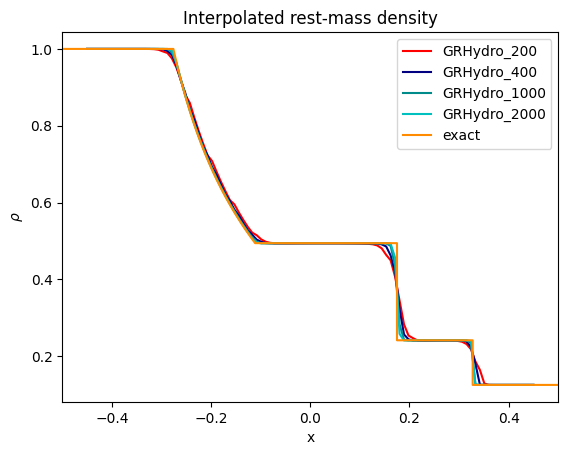

In [16]:
plt.plot(*rho_final_4.coordinates_meshgrid(), rho_final_4.data_xyz,color='r', label="GRHydro_200")
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz,color='navy', label="GRHydro_400")
#plt.plot(*rho_final_5.coordinates_meshgrid(), rho_final_5.data_xyz,color='violet', label="GRHydro_800")
plt.plot(*rho_final_2.coordinates_meshgrid(), rho_final_2.data_xyz,color='darkcyan', label="GRHydro_1000")
plt.plot(*rho_final_3.coordinates_meshgrid(), rho_final_3.data_xyz,color='c', label="GRHydro_2000")
plt.plot(x_exact, rho_exact,color='darkorange', label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)  #zoom
plt.xlabel('x')
plt.ylabel(r'$\rho$')
plt.title('Interpolated rest-mass density')
plt.legend()
plt.savefig('./Sod_imm/Interpol.png',dpi=300)
plt.show()                       #now I can change resolution (dx) and comment the results

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [17]:
#[iterazione][refinement level][component number]
rho[0][0][0].data
rho_2[0][0][0].data
rho_3[0][0][0].data
rho_4[0][0][0].data

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125,

In [18]:
rho[0][0][0].coordinates()[0].data
rho_2[0][0][0].coordinates()[0].data
rho_3[0][0][0].coordinates()[0].data
rho_4[0][0][0].coordinates()[0].data

array([-0.495, -0.49 , -0.485, -0.48 , -0.475, -0.47 , -0.465, -0.46 ,
       -0.455, -0.45 , -0.445, -0.44 , -0.435, -0.43 , -0.425, -0.42 ,
       -0.415, -0.41 , -0.405, -0.4  , -0.395, -0.39 , -0.385, -0.38 ,
       -0.375, -0.37 , -0.365, -0.36 , -0.355, -0.35 , -0.345, -0.34 ,
       -0.335, -0.33 , -0.325, -0.32 , -0.315, -0.31 , -0.305, -0.3  ,
       -0.295, -0.29 , -0.285, -0.28 , -0.275, -0.27 , -0.265, -0.26 ,
       -0.255, -0.25 , -0.245, -0.24 , -0.235, -0.23 , -0.225, -0.22 ,
       -0.215, -0.21 , -0.205, -0.2  , -0.195, -0.19 , -0.185, -0.18 ,
       -0.175, -0.17 , -0.165, -0.16 , -0.155, -0.15 , -0.145, -0.14 ,
       -0.135, -0.13 , -0.125, -0.12 , -0.115, -0.11 , -0.105, -0.1  ,
       -0.095, -0.09 , -0.085, -0.08 , -0.075, -0.07 , -0.065, -0.06 ,
       -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025, -0.02 ,
       -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,
        0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,
      

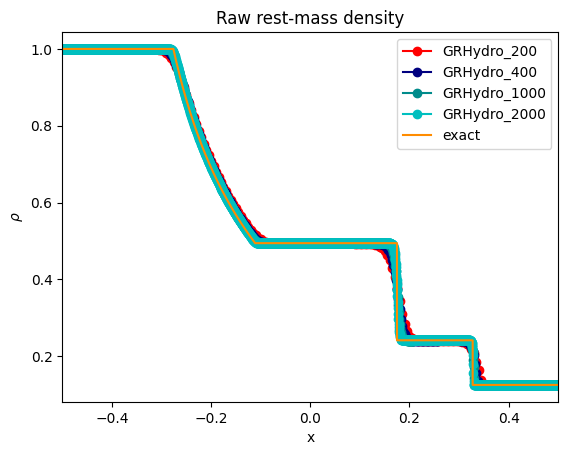

In [19]:
plt.plot(rho_4[100][0][0].coordinates()[0].data,rho_4[100][0][0].data,color='r', label="GRHydro_200", marker='o')
plt.plot(rho[200][0][0].coordinates()[0].data,rho[200][0][0].data,color='navy', label="GRHydro_400", marker='o')
plt.plot(rho_2[500][0][0].coordinates()[0].data,rho_2[500][0][0].data,color='darkcyan', label="GRHydro_1000", marker='o')
plt.plot(rho_3[1000][0][0].coordinates()[0].data,rho_3[1000][0][0].data,color='c', label="GRHydro_2000", marker='o')
plt.plot(x_exact, rho_exact,color='darkorange', label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0., 0.3)
plt.xlabel('x')
plt.ylabel(r'$\rho$')
plt.title('Raw rest-mass density')
plt.legend()
plt.savefig('./Sod_imm/Raw_400.png',dpi=300)
plt.show()                        #raw data

<function matplotlib.pyplot.show(close=None, block=None)>

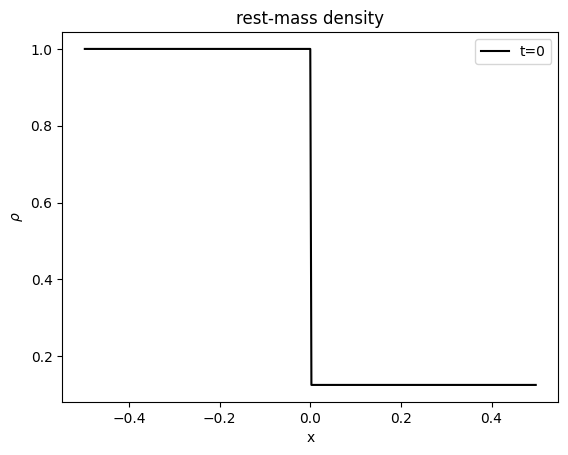

In [30]:
plt.plot(rho[0][0][0].coordinates()[0].data,rho[0][0][0].data,color='k', label="t=0")
plt.title('rest-mass density')
plt.xlabel('x')
plt.ylabel(r'$\rho$')
plt.legend()
plt.savefig('./Sod_imm/Initial_rho.png')
plt.show

In [41]:
press=vars1d.fields.press
press_2=vars1d_2.fields.press
press_3=vars1d_4.fields.press

<function matplotlib.pyplot.show(close=None, block=None)>

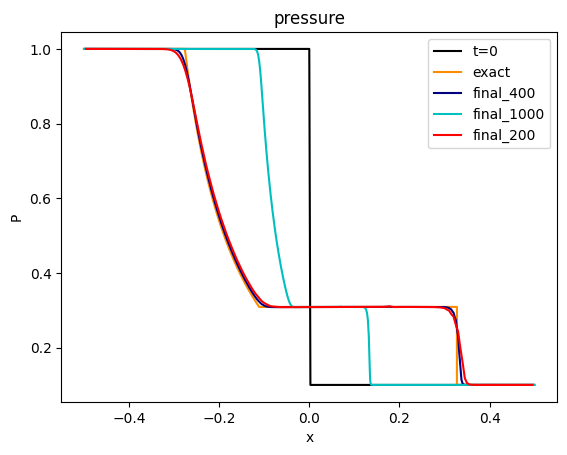

In [45]:
plt.plot(press[0][0][0].coordinates()[0].data,press[0][0][0].data,color='k', label="t=0")
plt.plot(x_exact, press_exact,color='darkorange', label="exact")
plt.plot(press[200][0][0].coordinates()[0].data,press[200][0][0].data,color='navy', label="final_400")
plt.plot(press_2[200][0][0].coordinates()[0].data,press_2[200][0][0].data,color='c', label="final_1000")
plt.plot(press_3[100][0][0].coordinates()[0].data,press_3[100][0][0].data,color='r', label="final_200")
plt.title('pressure')
plt.xlabel('x')
plt.ylabel('P')
plt.legend()
#plt.savefig('./Sod_imm/Initial_P.png')
plt.show

In [46]:
vel=vars1d.fields.vel
vel_2=vars1d_2.fields.vel
vel_3=vars1d_4.fields.vel

In [51]:
'''
plt.plot(rho[0][0][0].coordinates()[0].data,vel[0][0][0].keys,color='k', label="t=0")

plt.plot(x_exact, vx_exact,color='darkorange', label="exact")
plt.plot(vel[200][0][0].coordinates()[0].data,vel[200][0][0].data,color='navy', label="final_400")
plt.plot(vel_2[200][0][0].coordinates()[0].data,vel_2[200][0][0].data,color='c', label="final_1000")
plt.plot(vel_3[100][0][0].coordinates()[0].data,vel_3[100][0][0].data,color='r', label="final_200")
plt.title('velocity')
plt.xlabel('x')
plt.ylabel('P')
plt.legend()
#plt.savefig('./Sod_imm/Initial_P.png')

plt.show
'''

'\nplt.plot(rho[0][0][0].coordinates()[0].data,vel[0][0][0].keys,color=\'k\', label="t=0")\n\nplt.plot(x_exact, vx_exact,color=\'darkorange\', label="exact")\nplt.plot(vel[200][0][0].coordinates()[0].data,vel[200][0][0].data,color=\'navy\', label="final_400")\nplt.plot(vel_2[200][0][0].coordinates()[0].data,vel_2[200][0][0].data,color=\'c\', label="final_1000")\nplt.plot(vel_3[100][0][0].coordinates()[0].data,vel_3[100][0][0].data,color=\'r\', label="final_200")\nplt.title(\'velocity\')\nplt.xlabel(\'x\')\nplt.ylabel(\'P\')\nplt.legend()\n#plt.savefig(\'./Sod_imm/Initial_P.png\')\n\nplt.show\n'